<a href="https://colab.research.google.com/github/leekh8/Colaboratory/blob/main/ex05_%EB%8B%A4%EC%A7%84%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/Colaboratory/AISchool/'

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Colaboratory/AISchool


In [2]:
# @title 데이터 다운로드
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# @markdown # 손글씨 숫자 데이터셋
# @markdown - 훈련 데이터 6만개, 테스트 데이터 만개
# @markdown - 각각의 데이터는 28 x 28 크기로 구성
# @markdown - 흑백 이미지 (0-255)로 구성
# @markdown - 배경은 검정색, 글씨가 흰색로 구성

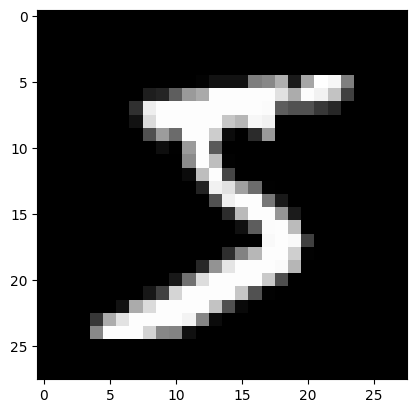

5


In [3]:
# @title 데이터 하나 확인
import matplotlib.pyplot as plt

digit = X_train[0]
label = y_train[0]

plt.imshow(digit, cmap = "gray")
plt.show()

print(label)

In [ ]:
# @markdown - 데이터 전처리
# @markdown   - 2차원 데이터를 1차원 데이터로 변환 (DNN 층의 입력이 1차원 이므로)
# @markdown   - 데이터 값의 범위를 0-255에서 0-1로 변환 (정규화(Scaling)) -> 과적합 줄어듬

In [4]:
# @title 2차원 -> 1차원
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [5]:
# @title 스케일링
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [6]:
# @title y 원핫인코딩
from tensorflow.keras.utils import to_categorical

y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

y_train_en.shape, y_test_en.shape

((60000, 10), (10000, 10))

In [7]:
# @title 라벨값 확인
import pandas as pd

print(pd.Series(y_train).unique())
print(pd.Series(y_test).unique())

[5 0 4 1 9 2 3 6 7 8]
[7 2 1 0 4 9 5 6 3 8]


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()

# 입력층
# model1.add(Dense(units = 512, input_dim = 28 * 28, activation = "sigmoid"))
model1.add(Dense(units = 512, input_dim = X_train.shape[1], activation = "sigmoid"))

# 은닉층
model1.add(Dense(units = 256, activation = "sigmoid"))

# 출력층
# model1.add(Dense(units = 10, activation = "softmax"))
model1.add(Dense(units = y_train_en.shape[1], activation = "softmax"))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [9]:
# @title 컴파일
model1.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [12]:
# @title 학습
# @markdown - batch_size: 한번에 학습할 때 사용할 데이터의 수

# @markdown - validation_data: 검증데이터 셋 설정

h1 = model1.fit(X_train, y_train_en, epochs = 10,
                batch_size = 100, validation_data=(X_test, y_test_en))

Epoch 1/10
600/600 [==============================] - 6s 9ms/step - loss: 0.4640 - accuracy: 0.8718 - val_loss: 0.2393 - val_accuracy: 0.9290
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2021 - accuracy: 0.9395 - val_loss: 0.1662 - val_accuracy: 0.9507
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1436 - accuracy: 0.9574 - val_loss: 0.1219 - val_accuracy: 0.9631
Epoch 4/10
600/600 [==============================] - 5s 9ms/step - loss: 0.1064 - accuracy: 0.9688 - val_loss: 0.1071 - val_accuracy: 0.9663
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0818 - accuracy: 0.9750 - val_loss: 0.0885 - val_accuracy: 0.9719
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0633 - accuracy: 0.9807 - val_loss: 0.0825 - val_accuracy: 0.9735
Epoch 7/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0503 - accuracy: 0.9845 - val_loss: 0.0704 - val_accuracy: 0.9780
Epoch 

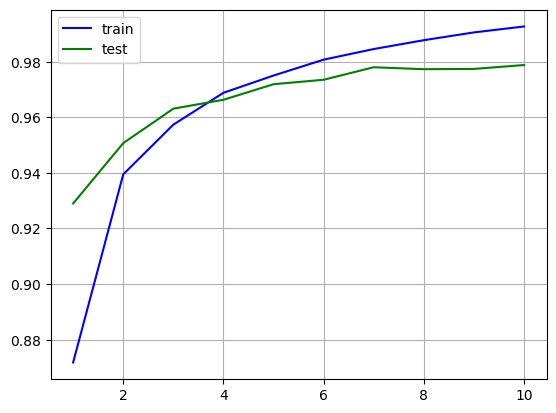

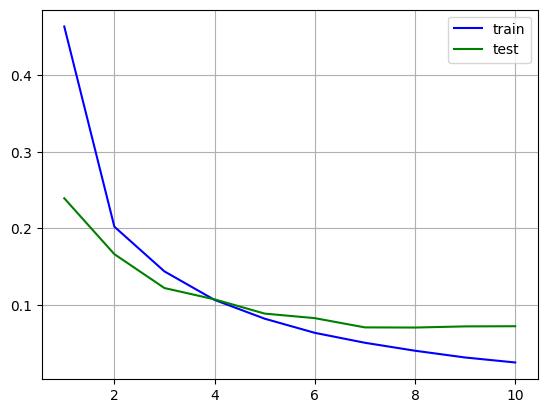

In [14]:
# @title 시각화
import matplotlib.pyplot as plt
import numpy as np

ep = np.arange(1, 11)

# 정확도
plt.plot(ep, h1.history["accuracy"], color = "blue", label = "train")
plt.plot(ep, h1.history["val_accuracy"], color = "green", label = "test")
plt.legend()
plt.grid()
plt.show()

# loss
plt.plot(ep, h1.history["loss"], color = "blue", label = "train")
plt.plot(ep, h1.history["val_loss"], color = "green", label = "test")
plt.legend()
plt.grid()
plt.show()

In [20]:
# @title 예측하기
pred = model1.predict(X_test[125:126])

print(pred)
print(y_test[125:126])

1/1 [==============================] - 0s 22ms/step
[[1.0989827e-07 6.4058913e-06 3.5534991e-04 2.6660701e-04 3.7173466e-03
  6.7704332e-07 8.6490132e-08 8.2146589e-06 4.1975020e-04 9.9522543e-01]]
[9]


In [ ]:
# @title 직접 쓴 손글씨 숫자 인식하기
# 이미지 가져오기
import PIL.Image as pilimg

gray_img = pilimg.open("./Data/3.png").convert("L")

# 파이썬 이미지 배열로 변환
pix = np.array(gray_img)

pix.shape

In [ ]:
plt.imshow(pix, cmap = "gray")
plt.show()

In [ ]:
pred = model1.predict(new_img)

pred

In [21]:
np.argmax(pred)

9